# (04) rebuttal results: LogReg

**Motivation**: Do logistic regression instead of KNN. Host: ```chewie```. <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
# sys.path.insert(0, os.path.join(git_dir, '_PoissonVAE'))
# sys.path.insert(0, os.path.join(git_dir, '_IterativeVAE'))
sys.path.insert(0, '/home/hadi/Dropbox/chkpts/pvae-source-code')
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
device_idx = 1
device = f'cuda:{device_idx}'

In [3]:
fig_dir = pjoin(fig_base_dir, 'rebuttal_aug')
os.makedirs(fig_dir, exist_ok=True)
print(os.listdir(fig_dir))

kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 600,
}

['temp.pdf']

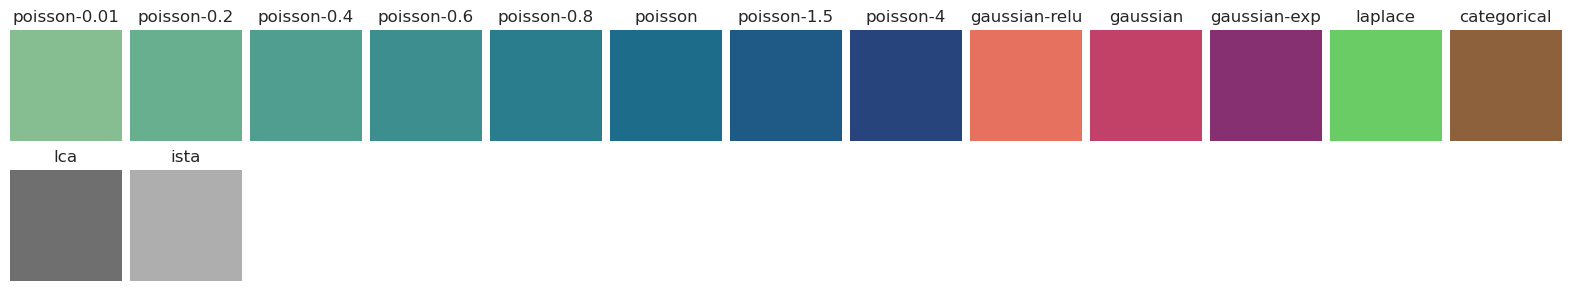

In [4]:
pal, _, _ = get_palette()
show_palette(pal, 13)

## Load df

In [5]:
df_clf = pjoin(tmp_dir, 'df_clf.df')
df_clf = pd.read_pickle(df_clf)

In [6]:
n_dims = [10, 50, 100]
models = ['poisson', 'categorical', 'laplace', 'gaussian', 'gaussian-relu', 'gaussian-exp']
df2p = df_clf.loc[
    (df_clf['type'].isin(models)) &
    (df_clf['n_dims'].isin(n_dims))
]

len(df2p)

90

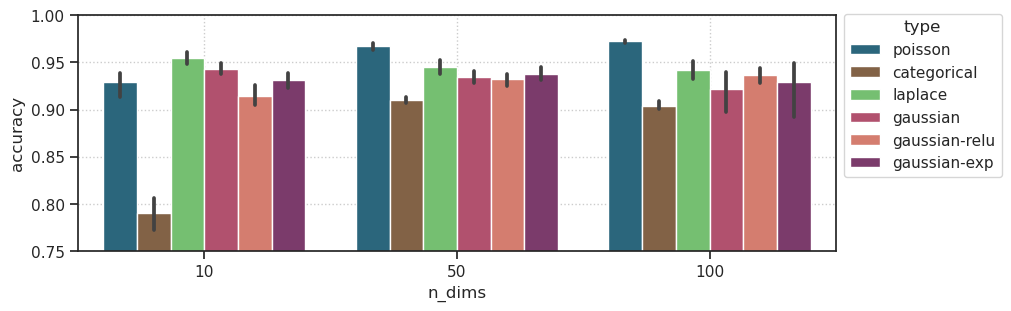

In [7]:
fig, ax = create_figure(1, 1, (10, 3))
sns.barplot(
    data=df2p,
    x='n_dims',
    y='accuracy',
    hue='type',
    palette=pal,
    hue_order=models,
)
move_legend(ax, (1, 1.04))
ax.set_ylim(0.75, 1.0)
ax.grid()
plt.show()

## Make fig

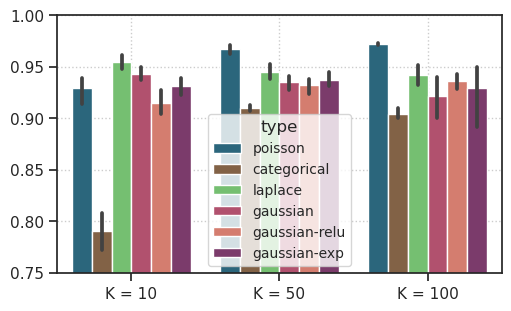

In [8]:
fig, ax = create_figure(1, 1, (5, 3.0))
sns.barplot(
    data=df2p,
    x='n_dims',
    y='accuracy',
    hue='type',
    palette=pal,
    hue_order=models,
)
sns.move_legend(ax, 'lower center', fontsize=10)
ax.set(ylim=(0.75, 1.0), xlabel='', ylabel='')
ax.set_xticklabels([f"K = {k}" for k in n_dims])
ax.grid()

fig.savefig(pjoin(fig_dir, 'logreg.pdf'), **kws_fig)
plt.show()